<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/lab05_Auto_MPG_LHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.read_csv('/content/auto-mpg.data-original.csv') #csv 파일을 불러온다. 그러나 첫번째 데이터가 index로 들어감

,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
400,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
401,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
402,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
403,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [10]:
data=pd.read_csv('/content/auto-mpg.data-original.csv',names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])

In [11]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
405,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


# 년도 수정

In [19]:
import datetime as dt

In [25]:
data['model year']

0      70
1      70
2      70
3      70
4      70
       ..
401    82
402    82
403    82
404    82
405    82
Name: model year, Length: 406, dtype: int64

In [64]:
pd.to_datetime(data['model year'],format='%y').dt.year

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
401    1982
402    1982
403    1982
404    1982
405    1982
Name: model year, Length: 406, dtype: int64

In [69]:
data['model year']=pd.to_datetime(data['model year'],format='%y').dt.year

In [70]:
data['model year']

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
401    1982
402    1982
403    1982
404    1982
405    1982
Name: model year, Length: 406, dtype: int64

# 원산지 데이터 변환

In [29]:
data['origin'].astype('category') #타입을 int에서 category로 수정

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    2
403    1
404    1
405    1
Name: origin, Length: 406, dtype: category
Categories (3, int64): [1, 2, 3]

In [30]:
data['origin']

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    2
403    1
404    1
405    1
Name: origin, Length: 406, dtype: int64

In [31]:
data['origin']=data['origin'].astype('category')

In [33]:
data['origin']

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    2
403    1
404    1
405    1
Name: origin, Length: 406, dtype: category
Categories (3, int64): [1, 2, 3]

In [34]:
data['origin'].cat.categories=['USA','EU','JAP']

In [71]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,USA,ford torino


#시각화

In [73]:
import seaborn as sns

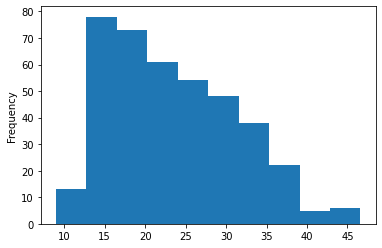

In [74]:
data['mpg'].plot.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


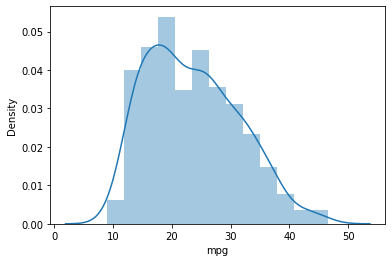

In [75]:
sns.distplot(data['mpg'])

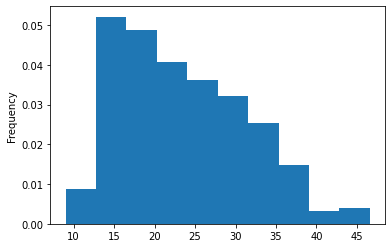

In [76]:
data['mpg'].plot.hist(density=True)

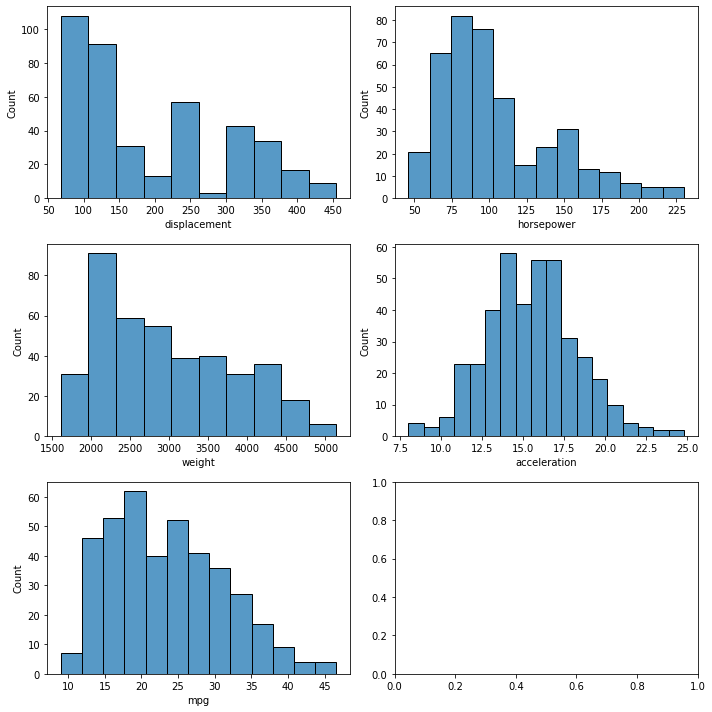

In [85]:
figure,ax=plt.subplots(3,2, figsize=(10,10))
sns.histplot(data['displacement'],ax=ax[0,0])
sns.histplot(data['horsepower'],ax=ax[0,1])
sns.histplot(data['weight'],ax=ax[1,0])
sns.histplot(data['acceleration'],ax=ax[1,1])
sns.histplot(data['mpg'],ax=ax[2,0])

plt.tight_layout()
plt.show(sns)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


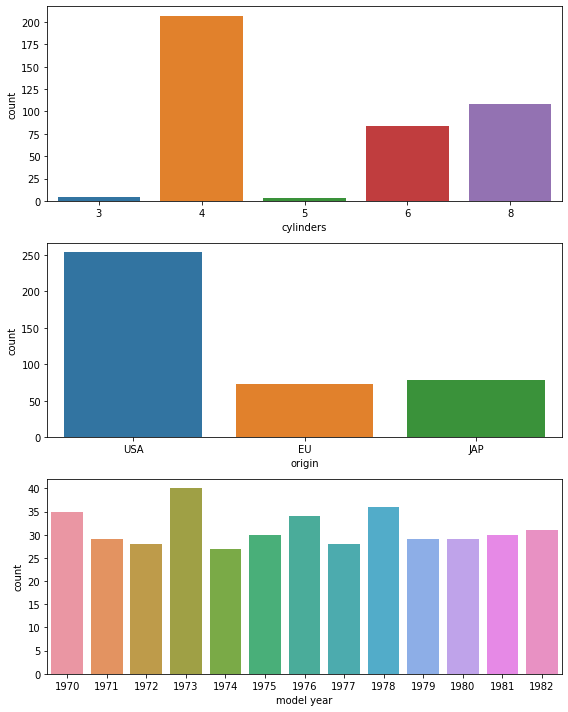

In [83]:
figure, ax=plt.subplots(nrows=3, figsize=(8,10))
sns.countplot(data['cylinders'],ax=ax[0])
sns.countplot(data['origin'],ax=ax[1])
sns.countplot(data['model year'],ax=ax[2])

plt.tight_layout()
plt.show(sns)

#편포도

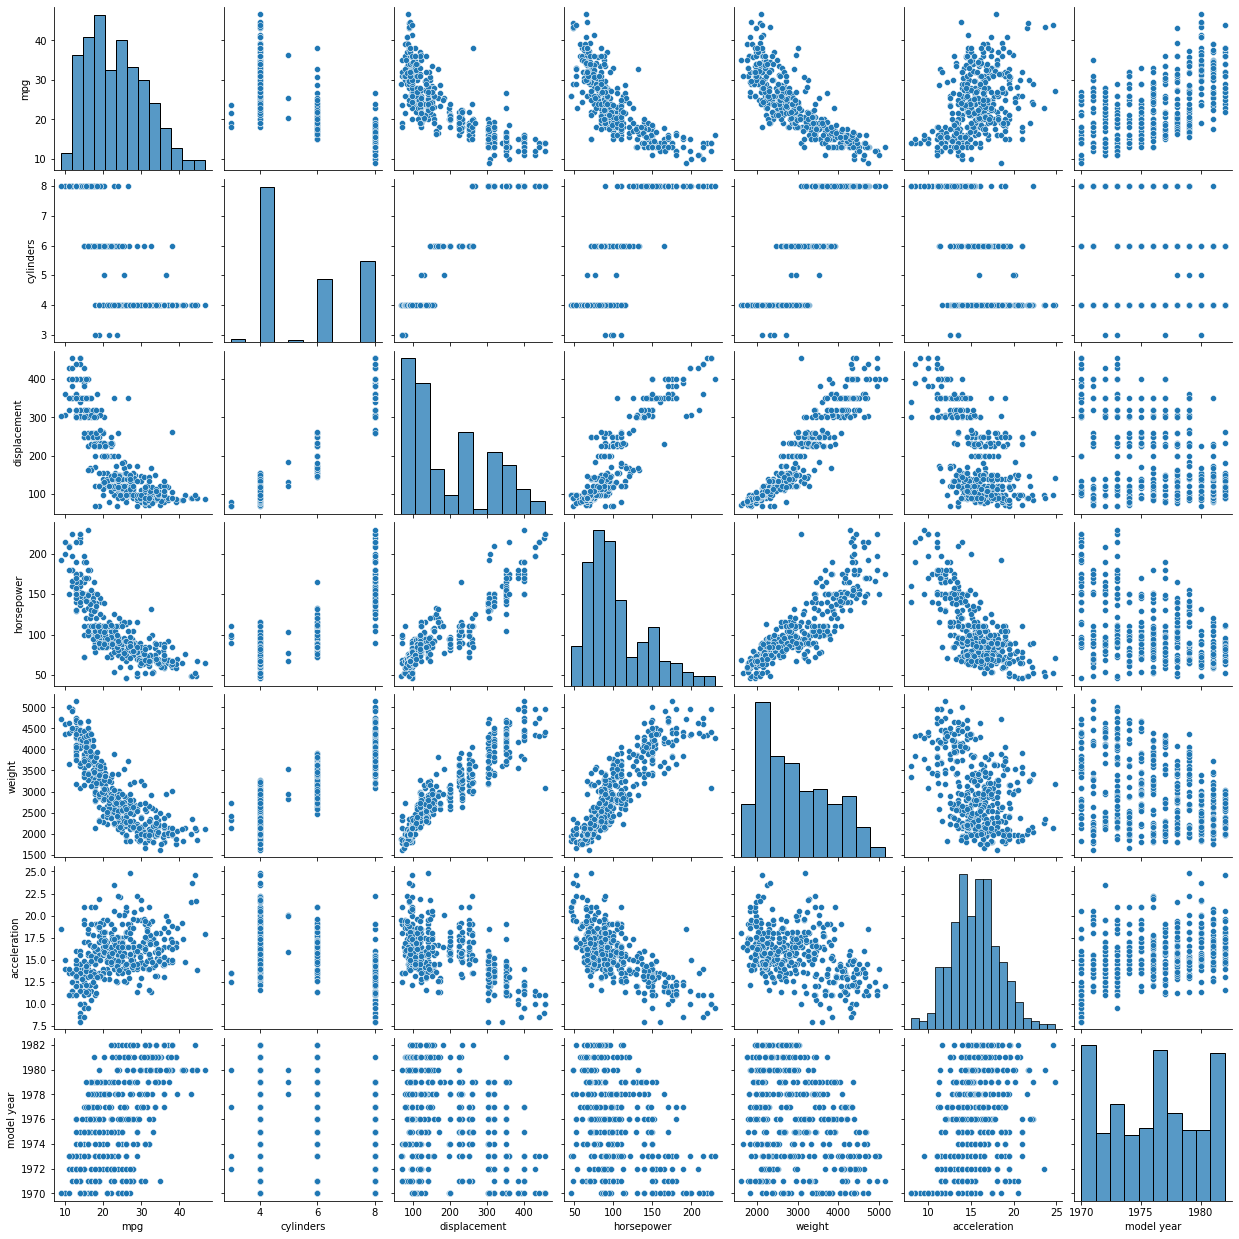

In [86]:
sns.pairplot(data)